<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%ED%9A%8C%EA%B7%80%EC%8B%A4%EC%8A%B5_%EC%9E%90%EC%A0%84%EA%B1%B0_%EB%8C%80%EC%97%AC_%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/pymlrev2/

In [1]:
path = '/content/drive/MyDrive/mldata/bike_train.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [15]:
df['datetime'] = pd.to_datetime(df['datetime'])
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [26]:
df['year'] =df['datetime'].apply(lambda x:x.year)
df['month']=df['datetime'].apply(lambda x:x.month)
df['day']=df['datetime'].apply(lambda x:x.day)
df['hour']=df['datetime'].apply(lambda x:x.hour)

In [27]:
df = df.drop(['datetime','casual','registered'],axis=1)

In [28]:
data = df.drop('count',axis=1)
label = df['count']

In [32]:
import seaborn as sns

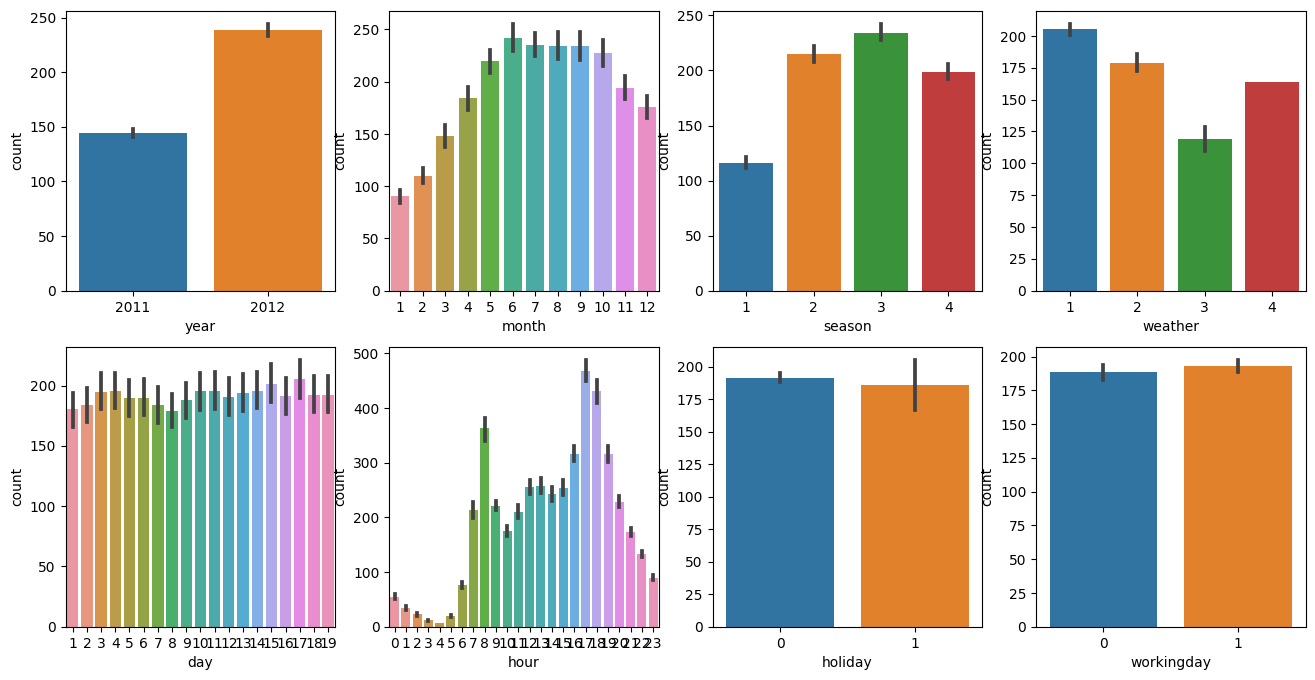

In [33]:
_,axes = plt.subplots(ncols=4,nrows=2,figsize=(16,8))
features = ['year','month','season','weather',
            'day','hour','holiday','workingday']
for i, feature in enumerate(features):
  r = int(i/4)
  c = i%4
  sns.barplot(x=feature,y='count',data=df,ax=axes[r][c])
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
def rmsle(y,pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  se = (log_y - log_pred)**2
  return np.sqrt(np.mean(se))

In [36]:
def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))

In [47]:
def evaluate_regr(y,pred):
  rv1 = rmsle(y,pred)
  rv2 = rmse(y,pred)
  rv3 = mean_absolute_error(y,pred)
  r2 = r2_score(y,pred)
  print(f'r2:{r2:.3f} RMSLE:{rv1:.3f} RMSE:{rv2:.3f} MAE:{rv3:.3f}')

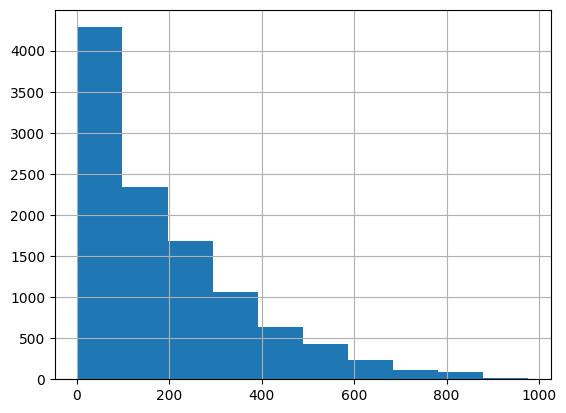

In [40]:
label.hist()
plt.show()

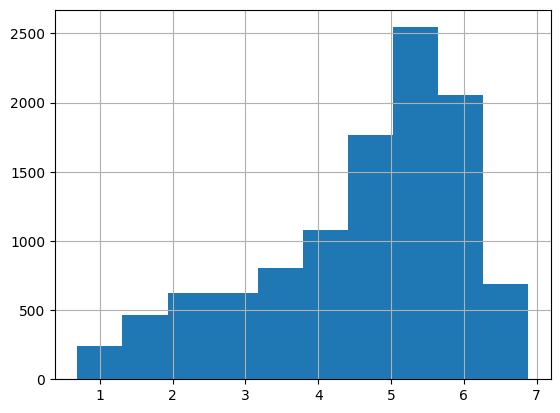

In [42]:
label_log1p = np.log1p(label)
label_log1p.hist()
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(data,
                                                 label)

In [48]:
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.383 RMSLE:1.206 RMSE:138.508 MAE:105.536


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


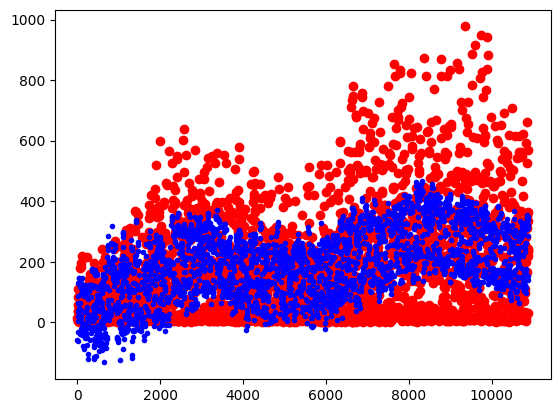

In [53]:
sdf = pd.DataFrame()
sdf['yt'] = y_test
sdf['pred'] = pred
plt.plot(sdf.index,y_test,'ro')
plt.plot(sdf.index,pred,'b.')
plt.show()

In [54]:
x_train,x_test,y_train,y_test = train_test_split(data,
                                                 label_log1p)

In [55]:
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.478 RMSLE:0.228 RMSE:1.017 MAE:0.802


In [56]:
pred_exp = np.expm1(pred)
pred_yt = np.expm1(y_test)
evaluate_regr(pred_yt,pred_exp)

r2:0.209 RMSLE:1.017 RMSE:161.502 MAE:107.685


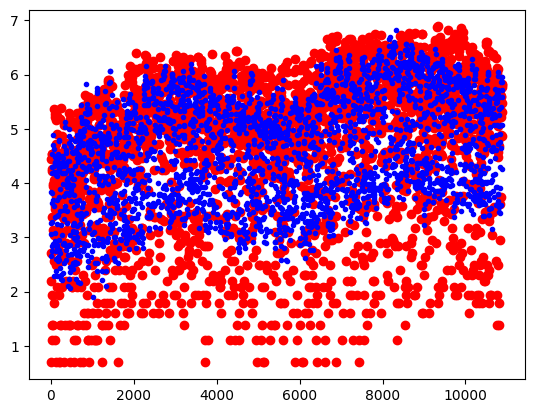

In [58]:
plt.plot(sdf.index,y_test,'ro')
plt.plot(sdf.index,pred,'b.')
plt.show()

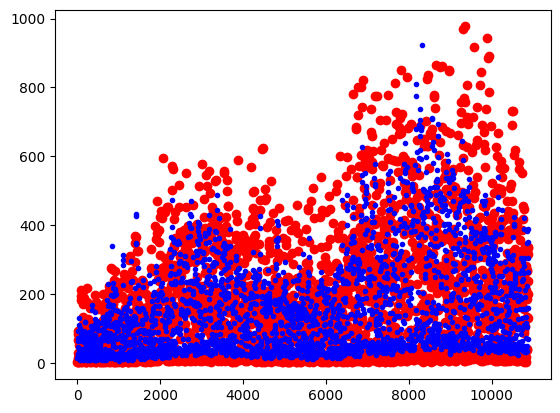

In [59]:
plt.plot(sdf.index,pred_yt,'ro')
plt.plot(sdf.index,pred_exp,'b.')
plt.show()

In [63]:
rdf = pd.DataFrame()
rdf['weight'] = model.coef_
rdf['feature'] = data.columns
rdf

,weight,feature
0,-0.035828,season
1,-0.052124,holiday
2,-0.087657,workingday
3,0.006149,weather
4,-0.003798,temp
5,0.046635,atemp
6,-0.014390,humidity
7,0.006991,windspeed
8,0.419372,year
9,0.070614,month


In [65]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234


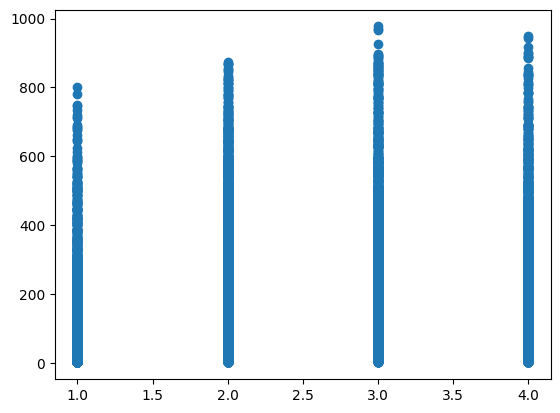

In [69]:
plt.scatter(x='season',y='count',data=df)
plt.show()

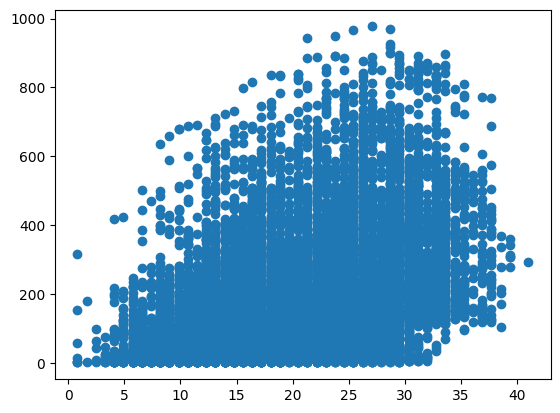

In [70]:
plt.scatter(x='temp',y='count',data=df)
plt.show()

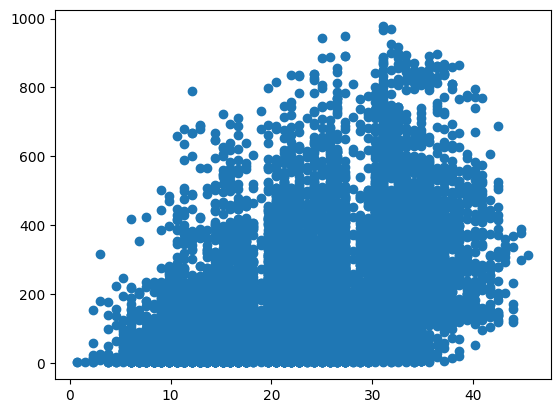

In [71]:
plt.scatter(x='atemp',y='count',data=df)
plt.show()

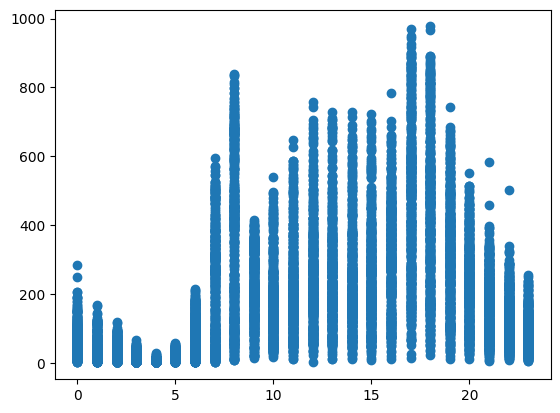

In [72]:
plt.scatter(x='hour',y='count',data=df)
plt.show()

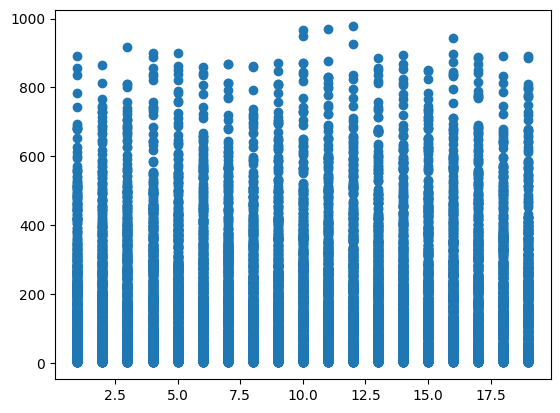

In [73]:
plt.scatter(x='day',y='count',data=df)
plt.show()

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
mms = MinMaxScaler()
mdata = mms.fit_transform(data)

,0,1,2,3,4,5,6,7,8,9,10,11
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.502205,0.028569,0.680875,0.139476,0.483098,0.512252,0.618865,0.224563,0.501929,0.501954,0.499587,0.501809
std,0.372058,0.166599,0.466159,0.211280,0.193917,0.189610,0.192450,0.143245,0.500019,0.313125,0.304256,0.300689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000,0.000000,0.326531,0.355856,0.470000,0.122840,0.000000,0.272727,0.222222,0.260870
50%,0.666667,0.000000,1.000000,0.000000,0.489796,0.525338,0.620000,0.228047,1.000000,0.545455,0.500000,0.521739
75%,1.000000,0.000000,1.000000,0.333333,0.632653,0.677928,0.770000,0.298225,1.000000,0.818182,0.777778,0.782609
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [90]:
x_train,x_test,y_train,y_test = train_test_split(mdata,
                                                 label)
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.371 RMSLE:1.164 RMSE:141.959 MAE:107.012


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [95]:
df.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439,-0.004797,0.971524,0.001729,-0.006546
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393,0.012021,0.001731,-0.015877,-0.000354
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594,-0.002482,-0.003394,0.009829,0.002780
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655,-0.012548,0.012144,-0.007890,-0.022740
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454,0.061226,0.257589,0.015551,0.145430
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784,0.058540,0.264173,0.011866,0.140343
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371,-0.078606,0.204537,-0.011335,-0.278011
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369,-0.015221,-0.150192,0.036157,0.146631
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000,0.260403,0.166862,0.019826,0.400601
year,-0.004797,0.012021,-0.002482,-0.012548,0.061226,0.058540,-0.078606,-0.015221,0.260403,1.000000,-0.004932,0.001800,-0.004234


In [94]:
cdf = pd.DataFrame()
cdf['coef'] = model.coef_
cdf['feature'] = data.columns
cdf.T

,0,1,2,3,4,5,6,7,8,9,10,11
coef,-16.916713,-0.143286,3.00681,-14.24728,68.428522,202.79632,-208.664185,38.641851,85.091621,100.294699,12.151482,182.392172
feature,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour


In [96]:
x_train,x_test,y_train,y_test = train_test_split(mdata,
                                                 label_log1p)

In [97]:
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.492 RMSLE:0.231 RMSE:1.011 MAE:0.791


In [98]:
pred_exp = np.expm1(pred)
pred_yt = np.expm1(y_test)
evaluate_regr(pred_yt,pred_exp)

r2:0.211 RMSLE:1.011 RMSE:157.972 MAE:105.189


In [99]:
ocs = ['year','month','day','hour','holiday',
       'workingday','season','weather']
data2 = pd.get_dummies(data,columns=ocs)
data2

,temp,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,month_4,...,workingday_0,workingday_1,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0000,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [100]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label)
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.696 RMSLE:0.838 RMSE:98.504 MAE:73.094


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [101]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label_log1p)
model = LinearRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
evaluate_regr(y_test,pred)
pred_exp = np.expm1(pred)
pred_yt = np.expm1(y_test)
evaluate_regr(pred_yt,pred_exp)

r2:0.819 RMSLE:0.144 RMSE:0.600 MAE:0.448
r2:0.720 RMSLE:0.600 RMSE:94.137 MAE:61.601


In [108]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label)
aps = [0,0.001,0.01,0.1,1,5,10,100]
for a in aps:
  model = Ridge(alpha=a)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print('alpha:',a)
  evaluate_regr(y_test,pred)

alpha: 0
r2:0.686 RMSLE:inf RMSE:102.936 MAE:75.871
alpha: 0.001
r2:0.686 RMSLE:0.832 RMSE:102.912 MAE:75.800
alpha: 0.01
r2:0.686 RMSLE:0.832 RMSE:102.912 MAE:75.800


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: divide by zero encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


alpha: 0.1
r2:0.686 RMSLE:0.831 RMSE:102.913 MAE:75.801
alpha: 1
r2:0.686 RMSLE:0.863 RMSE:102.924 MAE:75.810
alpha: 5
r2:0.685 RMSLE:0.838 RMSE:102.990 MAE:75.860


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


alpha: 10
r2:0.685 RMSLE:0.842 RMSE:103.104 MAE:75.942
alpha: 100
r2:0.655 RMSLE:0.940 RMSE:107.815 MAE:79.589


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [110]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label)
aps = [0,0.001,0.01,0.1,1,5,10,100]
for a in aps:
  model = Lasso(alpha=a)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print('alpha:',a)
  evaluate_regr(y_test,pred)

<ipython-input-110-6203605a3474>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+07, tolerance: 2.714e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
<ipython-input-35-76e4e081f690>:3: RuntimeW

alpha: 0
r2:0.693 RMSLE:0.822 RMSE:98.384 MAE:73.045


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.535e+05, tolerance: 2.714e+04
  model = cd_fast.enet_coordinate_descent(
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


alpha: 0.001
r2:0.693 RMSLE:0.822 RMSE:98.383 MAE:73.044


KeyboardInterrupt: ignored

In [111]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label_log1p)
aps = [0,0.001,0.01,0.1,1,5,10,100]
for a in aps:
  model = Lasso(alpha=a)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print('alpha:',a)
  evaluate_regr(y_test,pred)
  pred_exp = np.expm1(pred)
  pred_yt = np.expm1(y_test)
  evaluate_regr(pred_yt,pred_exp)

<ipython-input-111-64f370da47b6>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.376e+03, tolerance: 1.646e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


alpha: 0
r2:0.832 RMSLE:0.139 RMSE:0.582 MAE:0.434
r2:0.707 RMSLE:0.582 RMSE:96.243 MAE:61.782
alpha: 0.001
r2:0.831 RMSLE:0.139 RMSE:0.583 MAE:0.435
r2:0.702 RMSLE:0.583 RMSE:96.999 MAE:61.894
alpha: 0.01
r2:0.800 RMSLE:0.152 RMSE:0.634 MAE:0.487
r2:0.609 RMSLE:0.634 RMSE:111.100 MAE:70.419
alpha: 0.1
r2:0.243 RMSLE:0.282 RMSE:1.234 MAE:0.962
r2:0.078 RMSLE:1.234 RMSE:170.689 MAE:116.411
alpha: 1
r2:0.230 RMSLE:0.285 RMSE:1.244 MAE:0.973
r2:0.043 RMSLE:1.244 RMSE:173.918 MAE:118.139
alpha: 5
r2:0.076 RMSLE:0.307 RMSE:1.364 MAE:1.094
r2:-0.196 RMSLE:1.364 RMSE:194.394 MAE:135.378
alpha: 10
r2:-0.000 RMSLE:0.317 RMSE:1.418 MAE:1.147
r2:-0.267 RMSLE:1.418 RMSE:200.133 MAE:141.142
alpha: 100
r2:-0.000 RMSLE:0.317 RMSE:1.418 MAE:1.147
r2:-0.267 RMSLE:1.418 RMSE:200.133 MAE:141.142


In [112]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label_log1p)
aps = [0,0.001,0.01,0.1,1,5,10,100]
for a in aps:
  model = Ridge(alpha=a)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print('alpha:',a)
  evaluate_regr(y_test,pred)
  pred_exp = np.expm1(pred)
  pred_yt = np.expm1(y_test)
  evaluate_regr(pred_yt,pred_exp)

alpha: 0
r2:-5212135716237542948864.000 RMSLE:0.138 RMSE:101569570133.384 MAE:1946792005.218
r2:0.725 RMSLE:inf RMSE:95.803 MAE:61.976
alpha: 0.001
r2:0.829 RMSLE:0.138 RMSE:0.583 MAE:0.438
r2:0.725 RMSLE:0.583 RMSE:95.846 MAE:62.000
alpha: 0.01
r2:0.829 RMSLE:0.138 RMSE:0.583 MAE:0.438
r2:0.725 RMSLE:0.583 RMSE:95.846 MAE:62.000
alpha: 0.1
r2:0.829 RMSLE:0.138 RMSE:0.583 MAE:0.438
r2:0.725 RMSLE:0.583 RMSE:95.852 MAE:62.003
alpha: 1


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
<ipython-input-35-76e4e081f690>:3: RuntimeWarning: divide by zero encountered in log1p
  log_pred = np.log1p(pred)


r2:0.829 RMSLE:0.138 RMSE:0.582 MAE:0.438
r2:0.724 RMSLE:0.582 RMSE:95.915 MAE:62.031
alpha: 5
r2:0.829 RMSLE:0.138 RMSE:0.583 MAE:0.439
r2:0.722 RMSLE:0.583 RMSE:96.246 MAE:62.196
alpha: 10
r2:0.828 RMSLE:0.139 RMSE:0.583 MAE:0.440
r2:0.719 RMSLE:0.583 RMSE:96.757 MAE:62.458
alpha: 100
r2:0.789 RMSLE:0.159 RMSE:0.646 MAE:0.499
r2:0.636 RMSLE:0.646 RMSE:110.201 MAE:69.978


In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [114]:
x_train,x_test,y_train,y_test = train_test_split(data2,
                                                 label)

In [115]:
m1 = DecisionTreeRegressor()
m2 = RandomForestRegressor(n_estimators=500)
m3 = GradientBoostingRegressor(n_estimators=500)
m4 = XGBRegressor(n_estimators=500)
m5 = LGBMRegressor(n_estimators=500)
models = [m1,m2,m3,m4,m5]
for model in models:
  print(model.__class__.__name__)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  evaluate_regr(y_test,pred)

DecisionTreeRegressor
r2:0.820 RMSLE:0.562 RMSE:78.231 MAE:45.915
RandomForestRegressor
r2:0.921 RMSLE:0.486 RMSE:51.864 MAE:33.354
GradientBoostingRegressor


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


r2:0.915 RMSLE:0.577 RMSE:53.793 MAE:37.875
XGBRegressor


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


r2:0.932 RMSLE:0.504 RMSE:48.258 MAE:31.565
LGBMRegressor
r2:0.944 RMSLE:0.508 RMSE:43.598 MAE:28.793


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


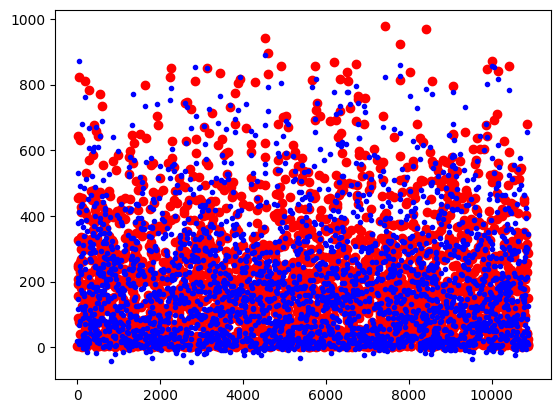

In [117]:
plt.plot(sdf.index,y_test,'ro')
plt.plot(sdf.index,pred,'b.')
plt.show()

classlightgbm.LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=None, importance_type='split', **kwargs)[source]

In [119]:
params = {
    'num_leaves' :[5,10,30,100],
    'max_depth' :[3,5,10,15,-1],
    'min_child_samples':[10,20,100,1000]
}

In [121]:
model = LGBMRegressor(n_estimators=500)
gs = GridSearchCV(model,param_grid=params,cv=5)
gs.fit(x_train,y_train)
pred = gs.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.944 RMSLE:0.514 RMSE:43.706 MAE:28.912


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)


In [122]:
gs.best_params_

{'max_depth': -1, 'min_child_samples': 20, 'num_leaves': 30}

In [124]:
params = {
    'max_leaves' :[5,10,30,100,0],
    'max_depth' :[3,5,10,15,30]
}

In [125]:
model = XGBRegressor(n_estimators=500)
gs = GridSearchCV(model,param_grid=params,cv=5)
gs.fit(x_train,y_train)
pred = gs.predict(x_test)
evaluate_regr(y_test,pred)

r2:0.936 RMSLE:0.500 RMSE:46.824 MAE:31.012


<ipython-input-35-76e4e081f690>:3: RuntimeWarning: invalid value encountered in log1p
  log_pred = np.log1p(pred)
